In [1]:
% matplotlib inline

import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [7]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
distance = ctrl.Antecedent(np.arange(0,11,1),'distance')
total_cost = ctrl.Antecedent(np.arange(0,11,1),'total_cost')
priority = ctrl.Consequent(np.arange(0,26,1),'priority')

distance['low'] = fuzz.trimf(distance.universe,[0,0,5])
distance['moderate'] = fuzz.trimf(distance.universe,[0,5,10])
distance['high'] = fuzz.trimf(distance.universe,[5,10,10])

total_cost['low'] = fuzz.trimf(total_cost.universe,[0,0,5])
total_cost['moderate'] = fuzz.trimf(total_cost.universe,[0,5,10])
total_cost['high'] = fuzz.trimf(total_cost.universe,[5,10,10])

priority['low'] = fuzz.trimf(priority.universe,[0,0,13])
priority['moderate'] = fuzz.trimf(priority.universe,[0,13,26])
priority['high'] = fuzz.trimf(priority.universe,[13,26,26])

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


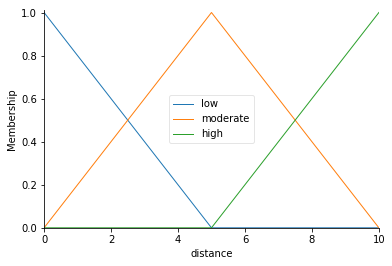

In [8]:
distance.view()

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


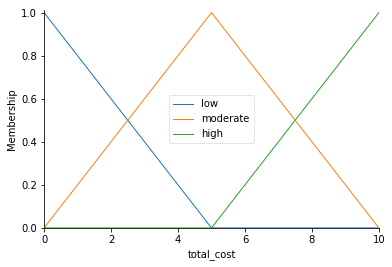

In [9]:
total_cost.view()

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


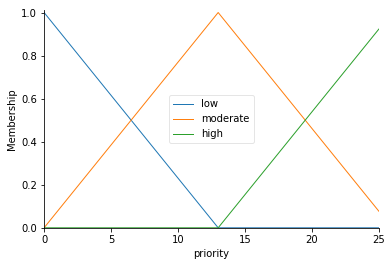

In [10]:
priority.view()

(<matplotlib.figure.Figure at 0x7f74b737fc50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74b3f73208>)

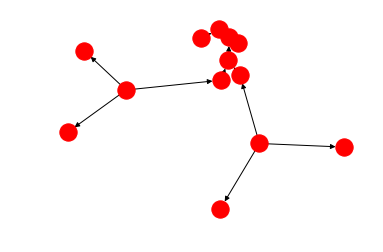

In [17]:
# 1. If the food is poor OR the service is poor, then the tip will be low
# 2. If the service is average, then the tip will be medium
# 3. If the food is good OR the service is good, then the tip will be high.

# Fuzzy Rules
rule1 = ctrl.Rule(distance['high'] & total_cost['low'],priority['low'])
rule2 = ctrl.Rule(distance['moderate'] & total_cost['low'],priority['low'])
rule3 = ctrl.Rule(distance['low'] & total_cost['low'],priority['moderate'])

rule4 = ctrl.Rule(distance['high'] & total_cost['moderate'],priority['moderate'])
rule5 = ctrl.Rule(distance['moderate'] & total_cost['moderate'],priority['moderate'])
rule6 = ctrl.Rule(distance['low'] & total_cost['moderate'],priority['high'])

rule7 = ctrl.Rule(distance['high'] & total_cost['high'],priority['high'])
rule8 = ctrl.Rule(distance['moderate'] & total_cost['high'],priority['high'])
rule9 = ctrl.Rule(distance['low'] & total_cost['high'],priority['moderate'])

rule1.view()

In [18]:
# Control System Creation and Simulation
priority_ctrl = ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
priority_sys = ctrl.ControlSystemSimulation(priority_ctrl)

In [19]:
priority_sys

In [20]:
# We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose
# we rated the quality 6.5 out of 10 and the service 9.8 of 10.
priority_sys.input['distance'] = 6.5
priority_sys.input['total_cost'] = 9.8

# compute the tip
priority_sys.compute()

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


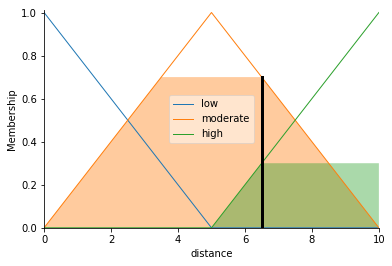

In [23]:
distance.view(sim=priority_sys)

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


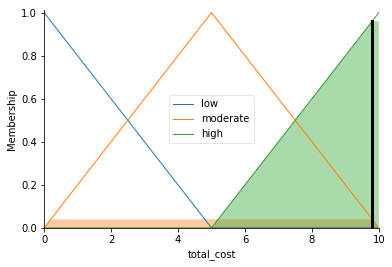

In [24]:
total_cost.view(sim=priority_sys)

In [21]:
priority_sys.output['priority']

19.527677703118293

/home/akash/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


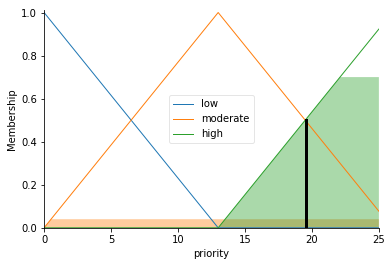

In [22]:
priority.view(sim=priority_sys)